In [ ]:
im1 = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_1.png"
im2="/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_2.pcd"
im3 = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_3.pcd"
im4 = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_4.pcd"
im5 = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_5.pcd"


In [ ]:
pcd1=o3d.io.read_point_cloud(im1)
pcd2=o3d.io.read_point_cloud(im2)
pcd3=o3d.io.read_point_cloud(im3)
pcd4=o3d.io.read_point_cloud(im4)
pcd5=o3d.io.read_point_cloud(im5)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 "/content/drive/MyDrive/Projects/cv/dataset/uncc-dataset/cereal_box_1/full/cereal_box_1_1_1.png"
 "/content/drive/MyDrive/Projects/cv/dataset/uncc-dataset/cereal_box_1/full/cereal_box_1_2_1.png"
 "/content/drive/MyDrive/Projects/cv/dataset/uncc-dataset/cereal_box_1/full/cereal_box_1_3_1.png"
 "/content/drive/MyDrive/Projects/cv/dataset/uncc-dataset/cereal_box_1/full/cereal_box_1_4_1.png"
"/content/drive/MyDrive/Projects/cv/dataset/uncc-dataset/cereal_box_1/full/cereal_box_1_5_1.png"

In [5]:
image1=cv2.imread(imag1)
image2=cv2.imread(imag2)
image3=cv2.imread(imag3)
image4=cv2.imread(imag4)
image5=cv2.imread(imag5)
images2 = [image1, image2, image3,image4,image5]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


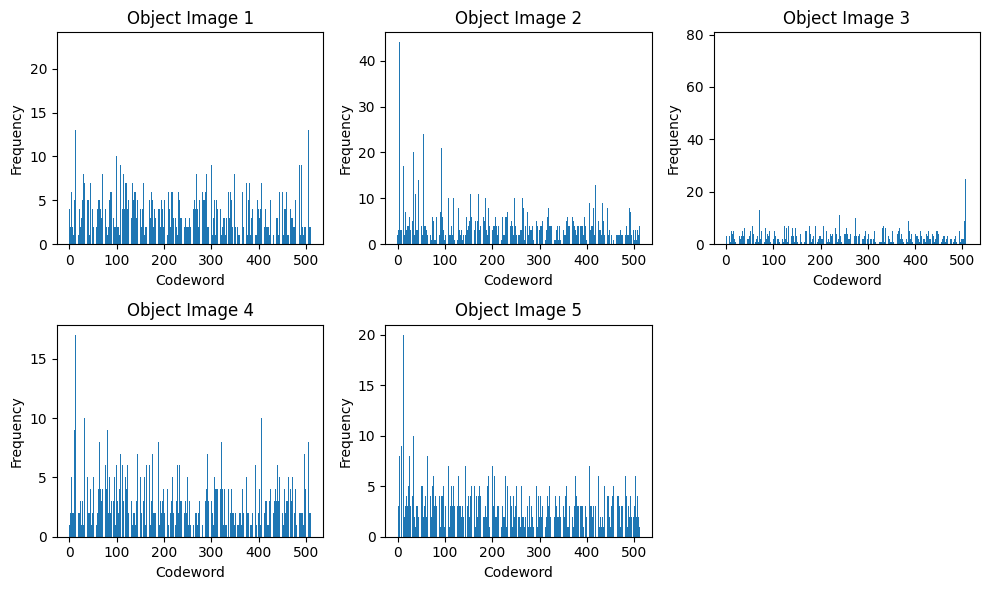

In [8]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


def extract_sift_descriptors(image):
    descriptors = []
    sift = cv2.xfeatures2d.SIFT_create()
    _, desc = sift.detectAndCompute(image, None)
    descriptors.extend(desc)
    return np.array(descriptors)


def perform_kmeans_clustering(descriptors, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(descriptors)
    return kmeans

def create_histogram(descriptors, kmeans):
    histogram = np.zeros(kmeans.n_clusters)
    labels = kmeans.predict(descriptors)
    for label in labels:
        histogram[label] += 1
    return histogram

image_paths = [ "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_1.png",
 "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_2.png",
 "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_3.png",
 "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_4.png",
"/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_5.png",
]

object_images = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    object_images.append(image)

# Step 2: Extract SIFT descriptors from the object images
sift_descriptors = []
for image in object_images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    descriptors = extract_sift_descriptors(gray)
    sift_descriptors.extend(descriptors)
sift_descriptors = np.array(sift_descriptors)

# Step 3: Perform k-means clustering on SIFT descriptors
k = 512  # Number of clusters
kmeans = perform_kmeans_clustering(sift_descriptors, k)

# Step 4: Create a histogram of codeword occurrences for each object image
histograms = []
for image in object_images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    descriptors = extract_sift_descriptors(gray)
    histogram = create_histogram(descriptors, kmeans)
    histograms.append(histogram)

# Step 5: Visualize the histograms
plt.figure(figsize=(10, 6))
for i, histogram in enumerate(histograms):
    plt.subplot(2, 3, i+1)
    plt.bar(range(k), histogram)
    plt.xlabel('Codeword')
    plt.ylabel('Frequency')
    plt.title(f'Object Image {i+1}')

plt.tight_layout()
plt.show()









/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 1.0


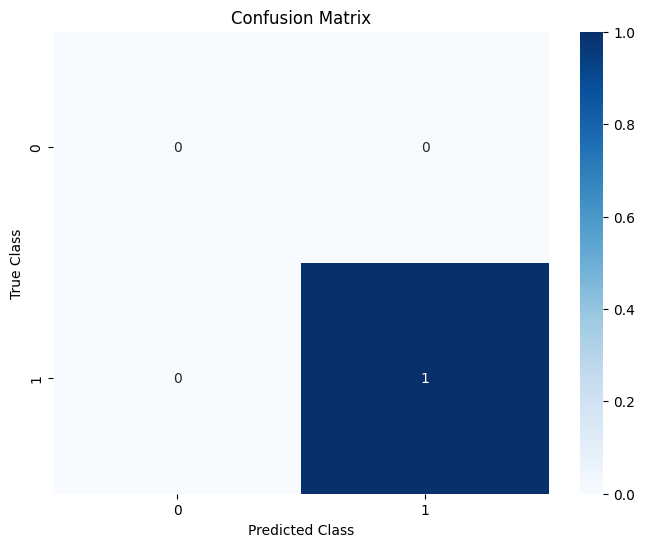

In [17]:


# Step 5: Prepare the data and labels for SVM training
X = np.array(histograms)
y = np.array([0, 0, 1, 1, 1])  # Assuming two classes for demonstration

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 7: Train the SVM model
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Step 8: Predict the classes of the test samples
predicted_classes = svm.predict(X_test)

# Step 9: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predicted_classes)
print("Accuracy:", accuracy)

# Step 10: Visualize the confusion matrix
labels = np.unique(y)
cm = confusion_matrix(y_test, predicted_classes, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


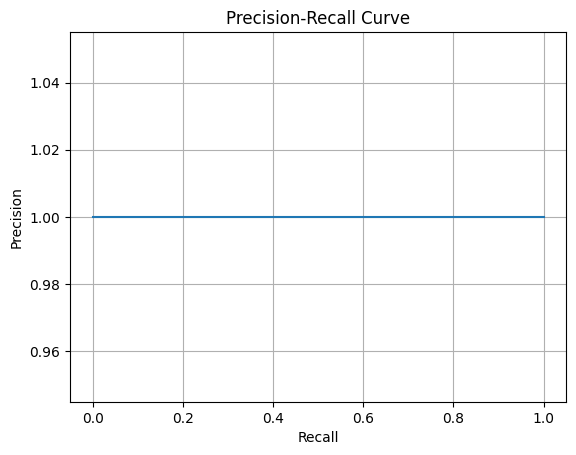

In [18]:



# Step 8: Predict the decision values for the test samples
decision_values = svm.decision_function(X_test)

# Step 9: Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, decision_values)

# Step 10: Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

ValueError: ignored